# 📊 Regressione Lineare con il Dataset delle Altezze

In questo notebook esploreremo un dataset contenente l'altezza dei padri (`fheight`) e dei figli (`sheight`), con l'obiettivo di costruire un modello di regressione lineare per prevedere l'altezza del figlio conoscendo quella del padre.

---

## Obiettivo

Guidarti passo dopo passo attraverso il ciclo di vita di un progetto di *Machine Learning supervisionato*, includendo:
- Esplorazione dei dati
- Preprocessing
- Addestramento del modello
- Valutazione
- Visualizzazione dei risultati


## 🔍 1. Esplorazione del dataset

### ✏️ Esercizio 1.1
Carica il dataset `pearson_dataset.csv` e stampa le prime 5 righe per esplorare la struttura dei dati.


In [ ]:
# Qui faccio l'esercizio 1.1
import pandas as pd
dataframe=pd.read_csv("pearson_dataset.csv")
dataframe.head()


,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113


### ✏️ Esercizio 1.2
Calcola media, mediana e deviazione standard delle due colonne `fheight` e `sheight`.


In [8]:
# Qui esercizio 1.2
fheight=dataframe[["fheight"]]
sheight=dataframe[["sheight"]]

mean=dataframe.mean()
median=dataframe.median()
std=dataframe.std()
print(mean)
print(std)
print(median)

fheight    67.687097
sheight    68.684070
dtype: float64
fheight    2.744868
sheight    2.814702
dtype: float64
fheight    67.76660
sheight    68.61582
dtype: float64


### ✏️ Esercizio 1.3
Invoca la funzione per disegnare uno scatterplot con `fheight` sull'asse X e `sheight` sull'asse Y per visualizzare la relazione tra le due variabili.




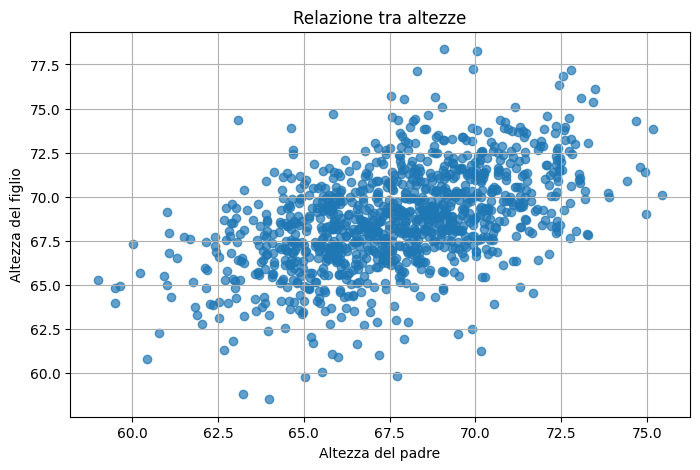

In [12]:
import matplotlib.pyplot as plt
def plot_scatter(df, x_col, y_col, x_label=None, y_label=None, title=None):
    """
    Crea uno scatter plot generico tra due colonne di un DataFrame.

    Parametri:
    - df: pandas DataFrame contenente i dati
    - x_col: nome della colonna da usare sull'asse X
    - y_col: nome della colonna da usare sull'asse Y
    - x_label: etichetta asse X (opzionale)
    - y_label: etichetta asse Y (opzionale)
    - title: titolo del grafico (opzionale)
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(df[x_col], df[y_col], alpha=0.7)
    plt.xlabel(x_label if x_label else x_col)
    plt.ylabel(y_label if y_label else y_col)
    plt.title(title if title else f"{y_col} vs {x_col}")
    plt.grid(True)
    plt.show()

# Esempio d'uso
plot_scatter(dataframe, "fheight", "sheight", "Altezza del padre", "Altezza del figlio", "Relazione tra altezze")



## 🧹 2. Preprocessing dei dati

### ✏️ Esercizio 2.1
Verifica se ci sono valori nulli nel dataset.


<Axes: ylabel='Density'>

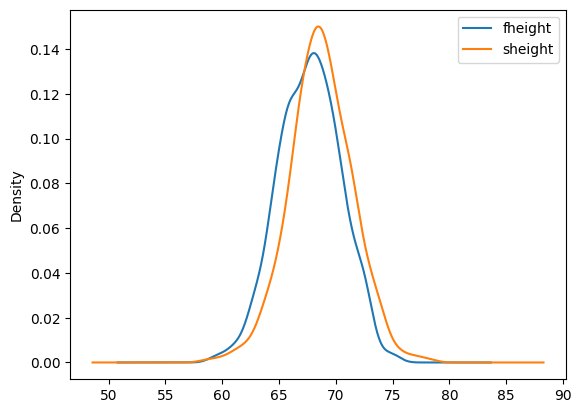

In [9]:
# Esercizio 2.1
dataframe.isnull().sum()
dataframe.plot.kde()


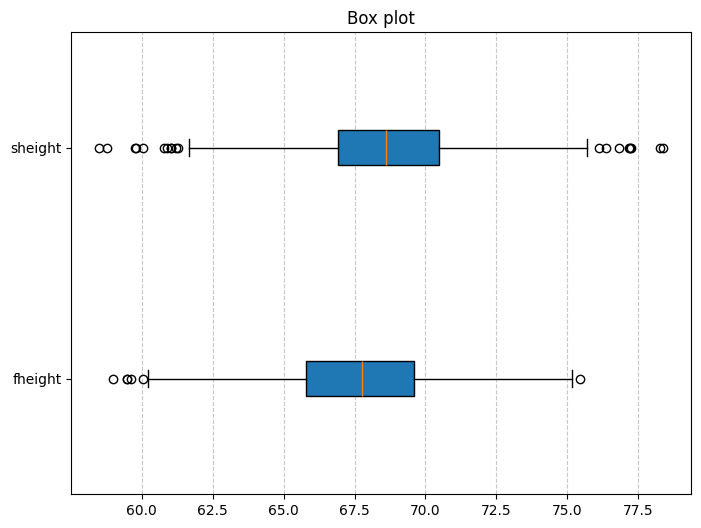

In [14]:

# Esercizio 2.2
plt.figure(figsize=(8,6))
plt.boxplot(dataframe.values,vert=False,patch_artist=True)
plt.yticks(range(1,len(dataframe.columns)+1),dataframe.columns)
plt.title("Box plot")
plt.grid(axis="x", linestyle="--",alpha=0.7)
plt.show()
            

### ✏️ Esercizio 2.2
Standardizza o normalizza i dati (opzionale) per sperimentare come cambiano i risultati.


[75.43393 78.36479]
[59.008   58.50708]


Text(0.5, 1.0, 'Box plot scaled')

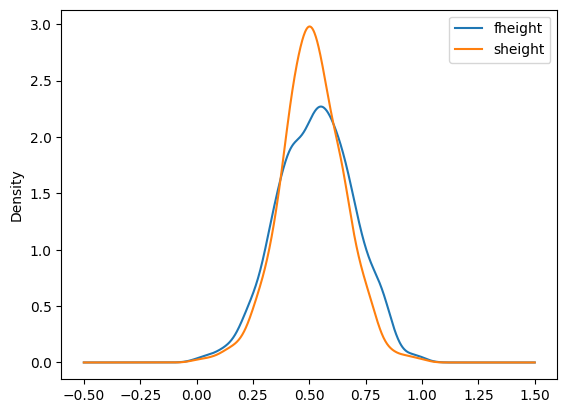

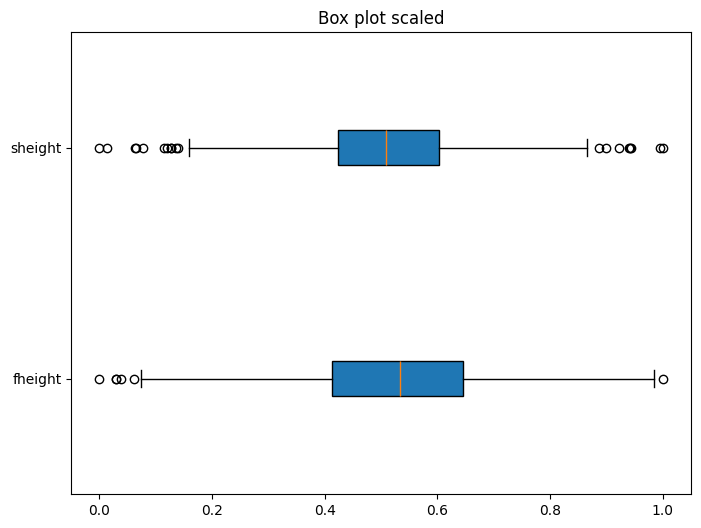

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataframe)
print(scaler.data_max_)
print(scaler.data_min_)
scaler.transform(dataframe)
dataframe_scaled = pd.DataFrame(scaler.transform(dataframe), columns=dataframe.columns)
dataframe_scaled.head()
dataframe_scaled.plot.kde()
plt.figure(figsize=(8,6))
plt.boxplot(dataframe_scaled.values,vert=False,patch_artist=True)
plt.yticks(range(1,len(dataframe_scaled.columns)+1),dataframe_scaled.columns)
plt.title("Box plot scaled")

# Esercizio 2.2
# Boxplot: Guida Completa

## Introduzione
Il **boxplot**, o diagramma a scatola e baffi, è un metodo grafico per rappresentare la distribuzione di un insieme di dati. È particolarmente utile per individuare valori anomali (outlier) e capire la dispersione dei dati.

## Componenti di un Boxplot
Un boxplot è composto da:

- **Mediana (Linea dentro il box):** Il valore centrale dei dati ordinati.
- **Primo quartile (Q1 - bordo inferiore del box):** Il 25° percentile dei dati.
- **Terzo quartile (Q3 - bordo superiore del box):** Il 75° percentile dei dati.
- **Intervallo interquartile (IQR):** La distanza tra Q1 e Q3.
- **Baffi:** Linee che si estendono fino al valore massimo e minimo non considerati outlier.
- **Outlier (Punti fuori dai baffi):** Valori considerati anomali, fuori dall'intervallo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].

## Esempio di Boxplot in Python
Ecco un codice Python per generare un boxplot con Matplotlib e Seaborn:

```python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creiamo dati casuali
np.random.seed(42)
data = np.random.randn(100) * 10 + 50 # Media 50, deviazione standard 10

# Creiamo il boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=data)
plt.title("Esempio di Boxplot")
plt.xlabel("Valori")
plt.show()



## 🤖 3. Creazione del modello

### ✏️ Esercizio 3.1
Dividi il dataset in un training set (80%) e un test set (20%).


In [ ]:
# Esercizio 3.1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
x=dataframe.drop(columns=["sheight"])
y=dataframe[["sheight"]]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
model=LinearRegression()
model.fit(x_train,y_train)
print("Intercetta", model.intercept_)
print("Coefficiente Angolare", model.coef_)
y_pred=model.predict(x_test)
mse=root_mean_squared_error(y_test,y_pred)
print(mse)


(862, 1)
(216, 1)
[64.07404652]
[[8.59998772]]
2.6123344373394737


### ✏️ Esercizio 3.2
Allena un modello di regressione lineare usando i dati di training.


In [ ]:
# Esercizio 3.2

### ✏️ Esercizio 3.3
Visualizza la retta di regressione sopra il grafico scatter.

👇 Ti diamo qui un esempio di funzione da utilizzare per questo tipo di visualizzazione:


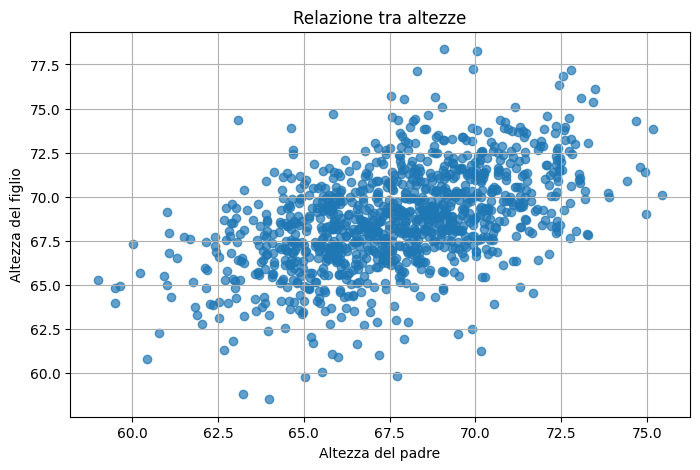

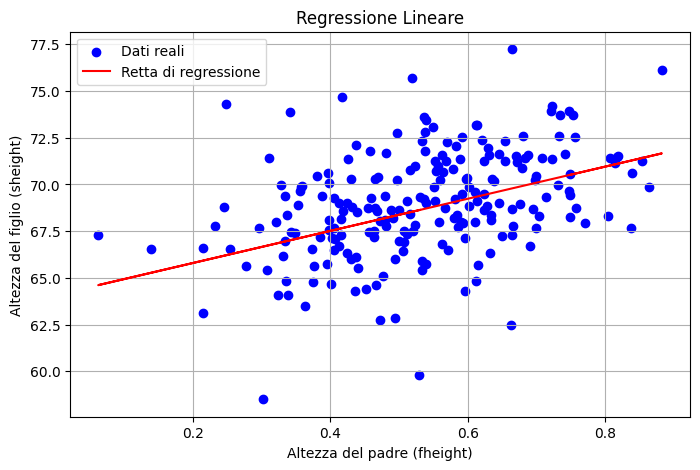

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_regression_line(x, y, model):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Dati reali')
    predicted = model.predict(np.array(x).reshape(-1, 1))
    plt.plot(x, predicted, color='red', label='Retta di regressione')
    plt.xlabel("Altezza del padre (fheight)")
    plt.ylabel("Altezza del figlio (sheight)")
    plt.title("Regressione Lineare")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_scatter(dataframe, "fheight", "sheight", "Altezza del padre", "Altezza del figlio", "Relazione tra altezze")
plot_regression_line(x_test, y_test, model)


## 📏 4. Valutazione del modello

### ✏️ Esercizio 4.1
Calcola l’MSE (Mean Squared Error) e R² sul test set per valutare le performance del modello.


In [ ]:
# Esercizio 4.1

### ✏️ Esercizio 4.2
Usa il modello per prevedere l’altezza di un figlio dato un valore ipotetico di altezza del padre (es. 70 pollici).


In [ ]:
# Esercizio 4.2

## 🚀 5. Pezzi finali

### ✏️ Esercizio 5.1
Aggiungi del rumore casuale ai dati e osserva come cambiano i risultati della regressione.


In [ ]:
# Esercizio 5.1

### ✏️ Esercizio 5.2
Crea una funzione che prende in input l’altezza del padre da tastiera e restituisce la previsione dell’altezza del figlio.


In [ ]:
# Esercizio 5.2